In [1]:
!pip install gensim


  Using cached smart_open-7.0.5-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 27.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 33.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 30.1 MB/s eta 0:00:00a 0:00:01
Using cached smart_open-7.0.5-py3-none-any.whl (61 kB)


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [4]:
#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
print(model.most_similar('frog'))
print(model.similarity('frog', 'toad'))

[('toad', 0.7010512948036194), ('snake', 0.6571155786514282), ('frogs', 0.6290439367294312), ('monkey', 0.6214002966880798), ('turtle', 0.6097555756568909), ('spider', 0.6079937815666199), ('ape', 0.5917872190475464), ('litoria', 0.585466206073761), ('rabbit', 0.5832656621932983), ('squirrel', 0.5779589414596558)]
0.70105135


In [5]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [6]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)

[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [7]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
model.most_similar(model["engineer"]+gender)

[('engineer', 0.8386673927307129),
 ('technician', 0.6592558026313782),
 ('educator', 0.6148399710655212),
 ('surgeon', 0.595658004283905),
 ('contractor', 0.5834692716598511),
 ('engineers', 0.5829452276229858),
 ('nurse', 0.5769463777542114),
 ('engineering', 0.5586187243461609),
 ('worker', 0.5585639476776123),
 ('physician', 0.5567296743392944)]

Part 2: Visualization and Embeddings in Space

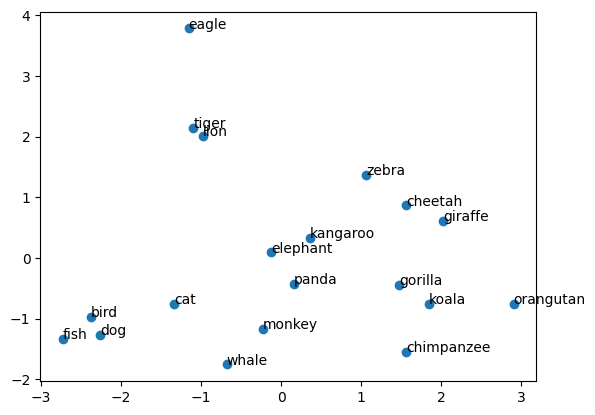

In [10]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

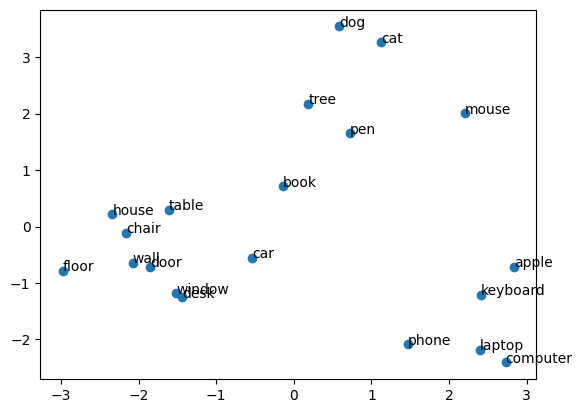

In [11]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["apple", "book", "desk", "pen", "cat", "dog", "tree", "house", "car", "phone",
             "computer", "laptop", "keyboard", "mouse", "chair", "table", "door", "window", "wall", "floor"]

X=[model[word] for word in words]

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

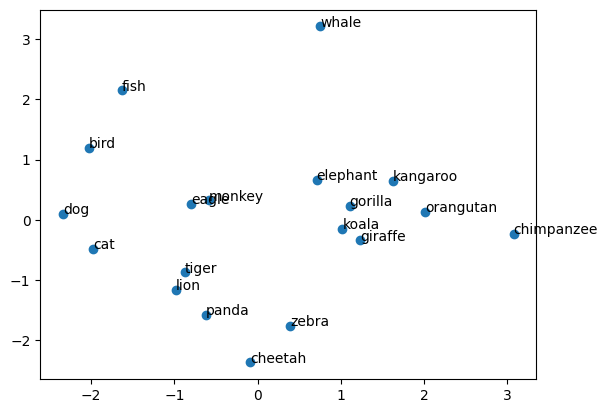

In [10]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

Part 3: Embedding reddit posts

In [12]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [13]:
!pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.12.5-py3-none-any.whl.metadata (15 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached langcodes-3.4.1-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached charset_normalizer-3.4.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10

In [15]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.9 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)

def lemmatize(text):
   doc = language_model(text)
   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
   return ' '.join(tokens)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not           2784
like          1191
people        1140
student        980
class          875
              ... 
duct             3
cis woman        3
dumbass          3
look thank       3
intimidate       3
Length: 8317, dtype: int64

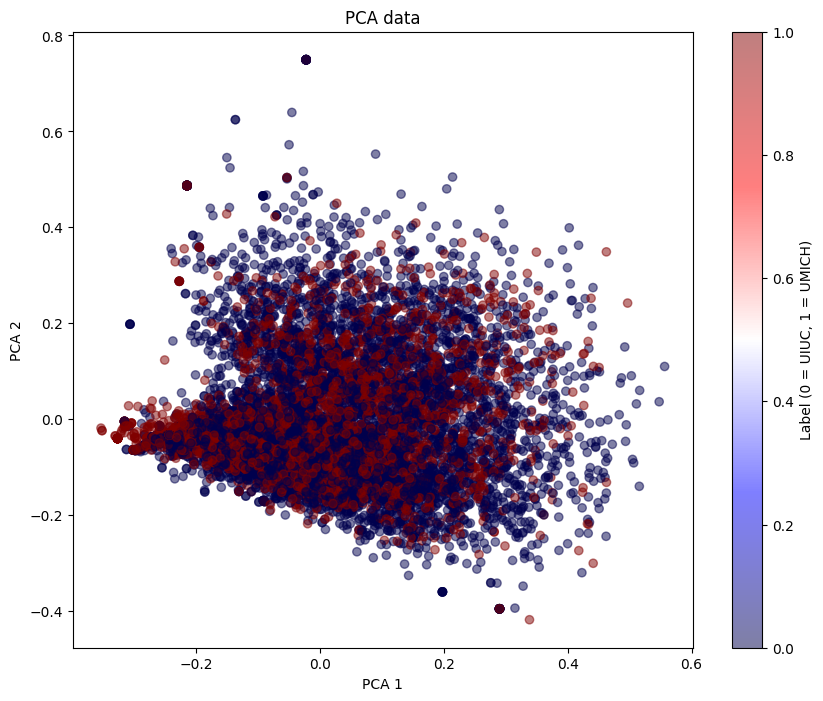

In [26]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

#color by the "label" column to see if the two subreddits are separable in the embedding space
data['label'] = np.where(data.index < len(uiuc), 0, 1)
vectorizer = TfidfVectorizer(max_features=300)
text_embeddings = vectorizer.fit_transform(data['text']).toarray()

pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(text_embeddings)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=data['label'], cmap='seismic', alpha = 0.5)
plt.colorbar(scatter, label='Label (0 = UIUC, 1 = UMICH)')
plt.title("PCA data")
plt.show()
# is there a clear separation between the two columns? 

No there is no clear separation between the two.

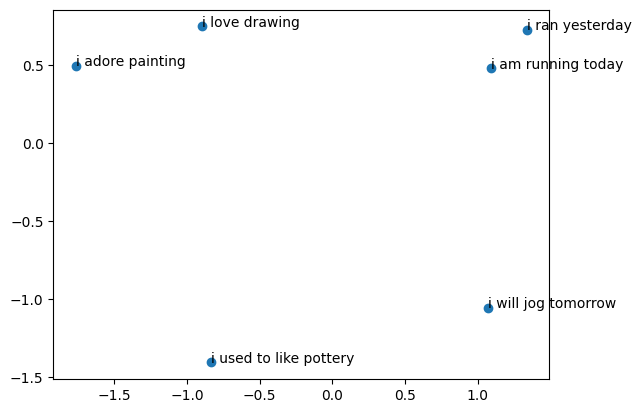

In [18]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

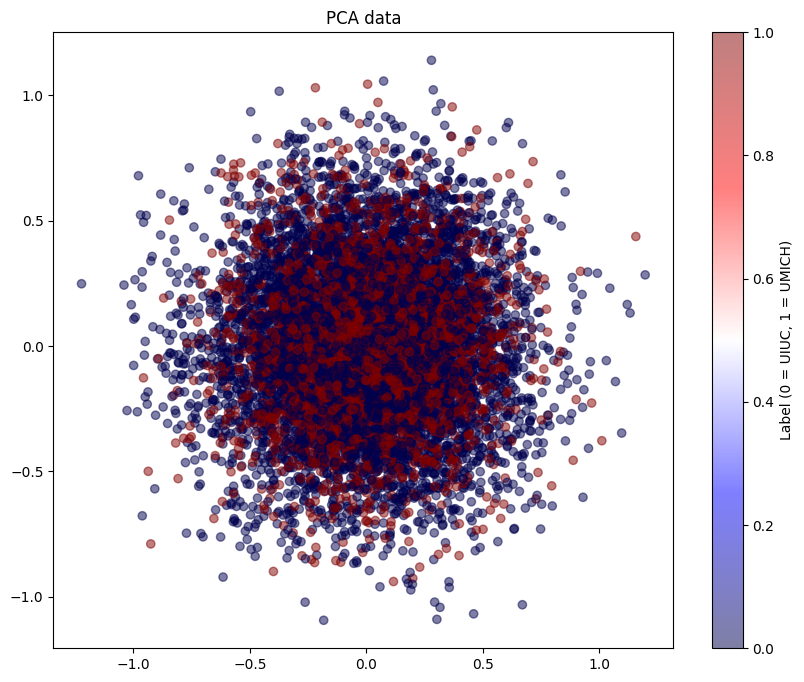

In [36]:
#use this function to calculate the average embedding of each post in the dataset
np.random.seed(0)
avg_embeddings = np.random.rand(len(data), 100)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

#plot the pca of the average embeddings, color by the "label" column

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='seismic', alpha = 0.5)
plt.colorbar(scatter, label='Label (0 = UIUC, 1 = UMICH)')
plt.title("PCA data")
plt.show()
#how is this plot different from the previous one?

#is there clear separation? 

The data is more less scattered but there is still no clear separation between the two.

Part 4: HuggingFace and BERT

In [21]:
!pip install numpy --upgrade
!pip install transformers
!pip install tf-keras

  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
tensorflow 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.2 which is incompatible.
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency re

In [22]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


/opt/anaconda3/envs/IS310/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [23]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9911694526672363}]

In [38]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
sentiments = []

for index, text in enumerate(data['cleaned_text']):
    try:
        result = pipe(text)
        if result and len(result) > 0:
            sentiments.append(result[0]['label'])
        else:
            sentiments.append("UNKNOWN")
    except Exception as e:
        sentiments.append("ERROR")

if len(sentiments) == len(data):
    data['sentiment'] = sentiments
else:
    print("Mismatch in lengths; not adding `sentiment` column.")
    print("Length of sentiments:", len(sentiments))
    print("Length of data:", len(data))

# Calculate negative sentiment counts for each subreddit
uiuc_negative_count = data[(data['label'] == 1) & (data['sentiment'] == 'NEG')].shape[0]
michigan_negative_count = data[(data['label'] == 0) & (data['sentiment'] == 'NEG')].shape[0]

print("\nNegative sentiment count in UIUC subreddit:", uiuc_negative_count)
print("Negative sentiment count in Michigan subreddit:", michigan_negative_count)

2024-11-06 13:43:34.087253: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,128] = 130 is not in [0, 130)



Negative sentiment count in UIUC subreddit: 386
Negative sentiment count in Michigan subreddit: 2127


In [39]:
#look at ten sample posts and labels; do you agree with all of them? 
pd.set_option('display.max_colwidth', None)
sample_posts = data[['text', 'sentiment']].sample(10)
print("Sample posts and their sentiments with full text:")
print(sample_posts)

Sample posts and their sentiments with full text:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

No i don't agree with some of them and i think the accuracy still needs to be improved. the second line says it is unsafe and they would rather ride a bike but it identifies as positive.

In [ ]:
#is the UIUC or Michigan subreddit more negative?

Michigan subreddit is more negative.